In [46]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [47]:
def accuracy(file):
    # Test accuracy for train data
    dftrain=pd.read_csv(file)
    rows=list(dftrain['Dataset Answer'])
    rowsans=list(dftrain['Answer'])
    true=0
    false=0
    for i in range(len(rows)):
        a= re.findall("\d+",rows[i])
        b= re.findall("\d+",rowsans[i])
        if len(b)==0:
            true+=1
            continue
        else:
            if a[len(a)-1] == b[len(b)-1]:
                true+=1
            else:
                false+=1
    truetest= ((true/(true+false))*100)
    falsetest= ((false/(true+false))*100)
    return truetest

In [48]:
cot_train=accuracy('chain_of_thought_output_train.csv')
cot_test=accuracy('chain_of_thought_output_test.csv')
data_train=accuracy('dataset_question_train.csv')
data_test=accuracy('dataset_question_test.csv')
ltm_train=accuracy('least_to_most_output_train.csv')
ltm_test=accuracy('least_to_most_output_test.csv')

print(f'Zero Shot {(data_train+data_test)/2:.3f}%')
print(f'Chain of thought {(cot_train+cot_test)/2:.3f}%')
print(f'Least to Most {(ltm_train+ltm_test)/2:.3f}%')


Zero Shot 68.287%
Chain of thought 65.053%
Least to Most 50.477%


[Text(0, 0, '68.29%'), Text(0, 0, '65.05%'), Text(0, 0, '50.48%')]

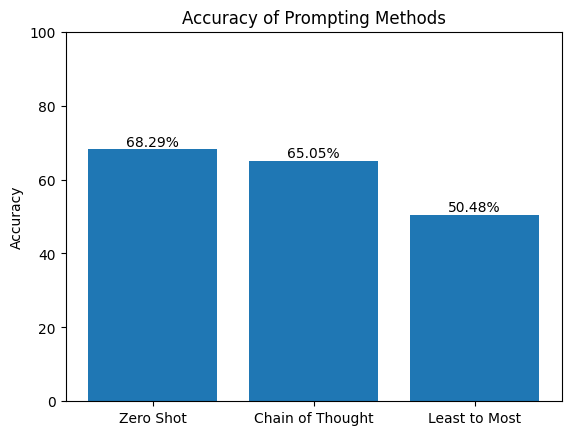

In [49]:
prompting_methods = ['Zero Shot', 'Chain of Thought', 'Least to Most']
methods_accuracy = [(data_train+data_test)/2, (cot_train+cot_test)/2, (ltm_train+ltm_test)/2]

fig, ax = plt.subplots()
bar_container = ax.bar(prompting_methods, methods_accuracy)
ax.set(ylabel='Accuracy', title='Accuracy of Prompting Methods', ylim=(0, 100))
ax.bar_label(bar_container, fmt='{:,.2f}%')